# Video Game Sales Trends and Analysis

The video game industry has changed drastically since the creation of the first video game in the early 70s. This analysis seeks to provide insight into how video games are rated via either Game Critics and the Users, and how that affects video game sales throughout the years. 

Overview

Data from: https://www.kaggle.com/holmjason2/videogamedata 

This data set contains content for over 13,000 video games, ranging from the years 1977 to the middle of 2020. Most of the data seemed to have come directly from the VGChartz database, which showcases critic scores and user scores, as well as how many copies of those games were sold. A lot of the critic and user scores were entered manually from MetaCritic.


Goals


1.   Are video games actually getting worse throughout the years or are they getting better?

2.   Do user ratings/critic ratings affect what game is bought/sold by various video game companies?



# Importing the Data

In [ ]:
#imports
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

# suppressing any warnings
import warnings
warnings.filterwarnings("ignore")


Importing Drive from google.colab

In [ ]:
#connecting google drive and google colab
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Uploading the DataFrame

In [ ]:
#creating the DataFrame
games_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/GameSales.csv', encoding_errors = 'ignore')
games_df.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


# Data Exploration

In [ ]:
#there are nulls that need to be handled
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           19600 non-null  int64  
 1   Name           19600 non-null  object 
 2   Platform       19600 non-null  object 
 3   Publisher      19600 non-null  object 
 4   Developer      19598 non-null  object 
 5   Critic_Score   9969 non-null   float64
 6   User_Score     2223 non-null   float64
 7   Total_Shipped  19600 non-null  float64
 8   Year           19600 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


Analyzing the DataFrame

In [ ]:
games_df.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


Checking the Null Categories

In [ ]:
#finding null values
null_cats = games_df.isnull().sum()
print(null_cats)
print('The total sum of null values across all categories is: {}'.format(games_df.isnull().sum().sum()))

Rank                 0
Name                 0
Platform             0
Publisher            0
Developer            2
Critic_Score      9631
User_Score       17377
Total_Shipped        0
Year                 0
dtype: int64
The total sum of null values across all categories is: 27010


# Data Cleaning

In [ ]:
#removing the NaN categories for later statistical analysis

print(games_df.size)

#using dropna to remove 'NaN' rows

games = games_df.dropna()

#printing size of the DataFrame
print(games.size)


176400
19872


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 19583
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           2208 non-null   int64  
 1   Name           2208 non-null   object 
 2   Platform       2208 non-null   object 
 3   Publisher      2208 non-null   object 
 4   Developer      2208 non-null   object 
 5   Critic_Score   2208 non-null   float64
 6   User_Score     2208 non-null   float64
 7   Total_Shipped  2208 non-null   float64
 8   Year           2208 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 172.5+ KB


# Descriptive Statistics

In [ ]:
games[['Critic_Score', 'User_Score', 'Total_Shipped', 'Year']].describe()

,Critic_Score,User_Score,Total_Shipped,Year
count,2208.000000,2208.000000,2208.000000,2208.000000
mean,7.478895,6.997690,1.426069,2014.287591
std,1.214125,1.511029,4.015623,4.204577
min,2.000000,1.000000,0.010000,1981.000000
25%,6.875000,6.300000,0.100000,2013.000000
50%,7.600000,7.200000,0.290000,2015.000000
75%,8.300000,8.000000,1.000000,2017.000000
max,10.000000,10.000000,82.900000,2020.000000


Checking Correlation

In [ ]:
#Quickly checking correlation
games[['Critic_Score','User_Score','Total_Shipped', 'Year']].corr()

,Critic_Score,User_Score,Total_Shipped,Year
Critic_Score,1.000000,0.515379,0.279579,-0.162331
User_Score,0.515379,1.000000,0.147868,-0.251022
Total_Shipped,0.279579,0.147868,1.000000,-0.315364
Year,-0.162331,-0.251022,-0.315364,1.000000


# Hypotheses:

**Hypothesis 1:**

1. Ho: Video games ratings are not changing based off of the year.
2. Ha: Video games ratings are changing based off of the year.

**Hypothesis 2:**
1. Ho: User and critic scores on video games do not affect how many copies of the games are being bought by customers.
2. Ha: User and critic scores on video games affect how many copies of the games are being bought by customers.




# Hypothesis 1 Testing

Critic Scores T-Testing

In [ ]:
#Creating two datasets: one with records in 2011 and one with records in 2020
critic_scores_2011 = games.loc[games['Year'] == 2011]
critic_scores_2019 = games.loc[games['Year'] == 2019]

critic_scores_2011.info()
critic_scores_2019.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 26 to 19223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           159 non-null    int64  
 1   Name           159 non-null    object 
 2   Platform       159 non-null    object 
 3   Publisher      159 non-null    object 
 4   Developer      159 non-null    object 
 5   Critic_Score   159 non-null    float64
 6   User_Score     159 non-null    float64
 7   Total_Shipped  159 non-null    float64
 8   Year           159 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 12.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 11 to 19023
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           34 non-null     int64  
 1   Name           34 non-null     object 
 2   Platform       34 non-null     object 
 3   Publisher      

In [ ]:
st.ttest_ind(critic_scores_2011['Critic_Score'], critic_scores_2019['Critic_Score'])


Ttest_indResult(statistic=-3.2579427801071885, pvalue=0.001328232373517522)

Given the results of our t-test, we can conclude there is a statistically significant difference in the average scores for Critics in 2011 and 2019




User Score T-Testing

In [ ]:
#Creating two datasets: one with records in 2011 and one with records in 2020
user_scores_2011 = games.loc[games['Year'] == 2011]
user_scores_2019 = games.loc[games['Year'] == 2019]

user_scores_2011.info()
user_scores_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 26 to 19223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           159 non-null    int64  
 1   Name           159 non-null    object 
 2   Platform       159 non-null    object 
 3   Publisher      159 non-null    object 
 4   Developer      159 non-null    object 
 5   Critic_Score   159 non-null    float64
 6   User_Score     159 non-null    float64
 7   Total_Shipped  159 non-null    float64
 8   Year           159 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 12.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 11 to 19023
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           34 non-null     int64  
 1   Name           34 non-null     object 
 2   Platform       34 non-null     object 
 3   Publisher      

In [ ]:
st.ttest_ind(user_scores_2011['User_Score'], user_scores_2019['User_Score'])

Ttest_indResult(statistic=0.4508102070199438, pvalue=0.6526376956631894)

Given the results of our t-test, we can conclude there is a not a statistically significant difference in the average scores for Users in 2011 and 2020.

# Hypothesis 2 Testing

In [ ]:
#Comparing total units sold with a User Score of 5 and 10
user_5 = games.loc[games['User_Score'] == 5]
user_10 = games.loc[games['User_Score'] == 10]

user_5.info()
user_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 697 to 16959
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           17 non-null     int64  
 1   Name           17 non-null     object 
 2   Platform       17 non-null     object 
 3   Publisher      17 non-null     object 
 4   Developer      17 non-null     object 
 5   Critic_Score   17 non-null     float64
 6   User_Score     17 non-null     float64
 7   Total_Shipped  17 non-null     float64
 8   Year           17 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 30 to 15696
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           14 non-null     int64  
 1   Name           14 non-null     object 
 2   Platform       14 non-null     object 
 3   Publisher      1

In [ ]:
stats.ttest_ind(user_5['Total_Shipped'], user_10['Total_Shipped'])

Ttest_indResult(statistic=-3.2108091741081064, pvalue=0.0032280168150595205)

Given the results of our t-test, we can conclude there is a statistically significant difference in the amount of copies sold with a User Score of 5 and a User Score of 10.

In [ ]:
#Comparing total units sold with a Critic Score of 5 and 10
critic_5 = games.loc[games['Critic_Score'] == 5]
critic_10 = games.loc[games['Critic_Score'] == 10]

critic_5.info()
critic_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2225 to 16926
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           15 non-null     int64  
 1   Name           15 non-null     object 
 2   Platform       15 non-null     object 
 3   Publisher      15 non-null     object 
 4   Developer      15 non-null     object 
 5   Critic_Score   15 non-null     float64
 6   User_Score     15 non-null     float64
 7   Total_Shipped  15 non-null     float64
 8   Year           15 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 1327
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4 non-null      int64  
 1   Name           4 non-null      object 
 2   Platform       4 non-null      object 
 3   Publisher      4 n

In [ ]:
stats.ttest_ind(critic_5['Total_Shipped'], critic_10['Total_Shipped'])

Ttest_indResult(statistic=-4.890542081479698, pvalue=0.00013786622095184395)

Given the results of our t-test, we can conclude there is a statistically significant difference in the amount of copies sold with a User Score of 5 and a User Score of 10.

# Calculating Confidence Intervals

In [ ]:
#Calculating Confidence Interval for Critic Scores 

data = games.loc[:, 'Critic_Score']

confidence_Level = 0.95   # 95% CI given
degrees_freedom = len(data)-1  #degree of freedom = sample size-1
sample_Mean = np.mean(data)    #sample mean
sample_Standard_Error = st.sem(data)  #sample standard error

confidence_Interval = st.t.interval(alpha=confidence_Level, df=degrees_freedom, loc=sample_Mean, scale=sample_Standard_Error)

print('The 95% confidence interval for the population mean of Critic Scores:',confidence_Interval)

The 95% confidence interval for the population mean of Critic Scores: (7.428225018782894, 7.529564836289601)


In [ ]:
#Calculating Confidence Interval for User Scores 

data = games.loc[:, 'User_Score']

confidence_Level = 0.95   # 95% CI given
degrees_freedom = len(data)-1  #degree of freedom = sample size-1
sample_Mean = np.mean(data)    #sample mean
sample_Standard_Error = st.sem(data)  #sample standard error

confidence_Interval = st.t.interval(alpha=confidence_Level, df=degrees_freedom, loc=sample_Mean, scale=sample_Standard_Error)

print('The 95% confidence interval for the population mean of User Scores:',confidence_Interval)

The 95% confidence interval for the population mean of User Scores: (6.934629420388812, 7.0607510143938095)


In [ ]:
#Calculating Confidence Interval for Total Units Shipped

data = games.loc[:, 'Total_Shipped']

confidence_Level = 0.95   # 95% CI given
degrees_freedom = len(data)-1  #degree of freedom = sample size-1
sample_Mean = np.mean(data)    #sample mean
sample_Standard_Error = st.sem(data)  #sample standard error

confidence_Interval = st.t.interval(alpha=confidence_Level, df=degrees_freedom, loc=sample_Mean, scale=sample_Standard_Error)

print('The 95% confidence interval for the population mean of Total Units Shipped:',confidence_Interval)

The 95% confidence interval for the population mean of Total Units Shipped: (1.2584820776357355, 1.5936556035237097)


# Exploring Sales Data

Histogram for the Critic Scores

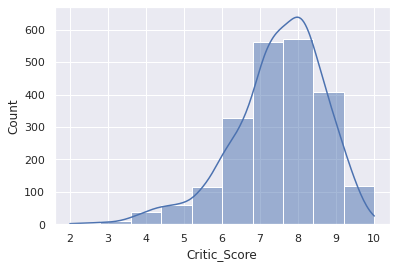

In [ ]:
#Distribution for the Critic Score
sns.histplot(games['Critic_Score'], bins = 10, kde = True)

Histogram for User Scores

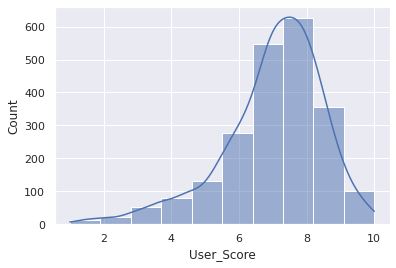

In [ ]:
#Distribution for User_Score
sns.histplot(games['User_Score'], bins = 10, kde = True)

Histogram for Total Units Shipped

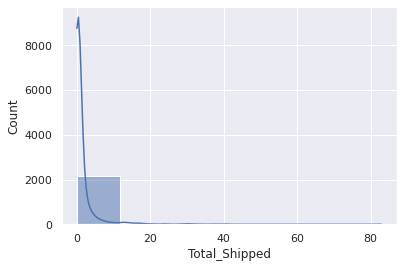

In [ ]:
#Distribution for Total_Shipped
sns.histplot(games['Total_Shipped'], bins = 7, kde = True)

Histogram for the Years

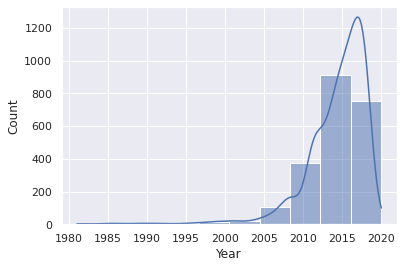

In [ ]:
#Distribution for Year
sns.histplot(games['Year'], bins = 10, kde = True)

Box Plots

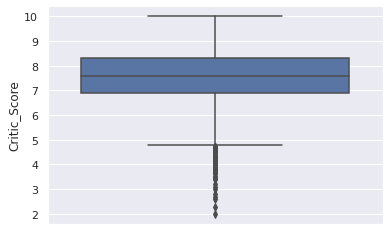

In [ ]:
sns.boxplot(y='Critic_Score', data=games)

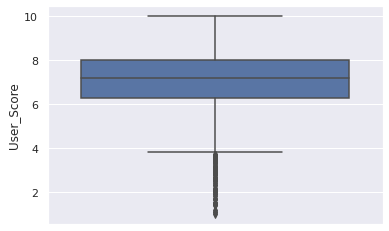

In [ ]:
sns.boxplot(y='User_Score', data=games)

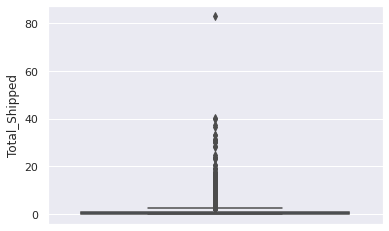

In [ ]:
sns.boxplot(y='Total_Shipped', data=games)

# Pearsonr Test for Correlation

Testing for correlation between the critic scores and year, user scores and year, total units shipped and the critic score, and total units shipped and the user score. 

In [ ]:
#Testing: returns correlation coefficient (r) and a p-value
critic_corr = stats.pearsonr(games['Critic_Score'],games['Year'])
print('Results of pearsonr for Critic Score and Year:' , critic_corr)

user_corr = stats.pearsonr(games['User_Score'],games['Year'])
print('Results of pearsonr for User Score and Year:' , user_corr)

shipped_corr = stats.pearsonr(games['Total_Shipped'],games['Critic_Score'])
print('Results of pearsonr for Total Shipped and Critic Scores:' , shipped_corr)

user_shipped_corr = stats.pearsonr(games['Total_Shipped'],games['User_Score'])
print('Results of pearsonr for Total Shipped and User Scores:' , user_shipped_corr)


Results of pearsonr for Critic Score and Year: (-0.16233104037893897, 1.6610837550832826e-14)
Results of pearsonr for User Score and Year: (-0.25102238019225004, 4.466959987532188e-33)
Results of pearsonr for Total Shipped and Critic Scores: (0.27957910171873995, 6.223566316852731e-41)
Results of pearsonr for Total Shipped and User Scores: (0.14786827110498316, 2.895231989991602e-12)


# Results

**Hypothesis 1 Results:**

1. There is a significant difference at the < 0.05 level in the average scores for Critics in 2011 and 2020. With 95% Confidence, the average Critic Scores in 2011 is between 7.42 and 7.52 higher than the average Critic Scores in 2020.

2. Fail to reject the null hypothesis. The difference is not significant at the 95% confidence level. The average user scores in 2011 are not higher than the average user scores in 2020.



**Hypothesis 2 Results:**

1. There is a significant difference at the < 0.05 level in the average number of copies sold based off the games' popularities. With 95% confidence, the average number of units sold with a Critic Score of 10 is 1.25 million to 1.59 million higher compared to the number of units sold with a Critic Score of 5.
2. The same goes for the games with a User Score.

# What does this mean?

This means that, based off of the data that was provided, the ratings for video games affect how often they are bought/sold. Also, this means that the ratings of video games are declining due to how many games are being made in more current years, as well as due to how they are rated by both Critics and Users.

Recommendations:

> Stakeholders should turn their focus on how video games are scored via gaming Critics and their own users.

> The better the ratings, the higher the sales, which means there will be more units sold.




